In [ ]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("handled-car-mpg.csv")

# Separate features (X) and target (y)
X = df.drop('mpg', axis=1).values
y = df['mpg'].values.reshape(-1, 1)


# Step 1: Shuffle the data
np.random.seed(42)  # for reproducibility
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

X = X[indices]
y = y[indices]

# Step 2:Using 80/20 split due to the small dataset size.
split_index = int(0.8 * X.shape[0])
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Step 3: Z-score normalization (standardization) for X
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train_scaled = (X_train - mean) / std
X_test_scaled = (X_test - mean) / std  # use train mean & std!

# Step 4: Initialize parameters
m, n = X_train_scaled.shape
w = np.random.uniform(low=-1.0, high=1.0, size=(n, 1))
b = 0.0


In [92]:
std

array([0.10406261, 0.49988011, 0.08512339, 0.40054641, 0.44399726,
       3.68632832, 2.76066629, 0.28377442, 0.54042403, 0.35181469])

# **Multiple Linear Regression model from Scratch**

In [93]:
#Functions

def compute_cost(x, y, w, b):
    m,n = x.shape

    f_wb = np.dot(x,w) + b
    cost = (1/(2 *m)) * np.sum((f_wb - y)**2)
    return cost

def soft_sign(w, epsilon=1e-6):     
    return w / (np.abs(w) + epsilon)

def compute_gradient(x, y, w, b, L1_reg , L2_reg , use_soft_sign): #Toggle soft_sign to True for L1 regularization with soft_sign
    m = x.shape[0]
    f_wb = np.dot(x, w) + b
    error = f_wb - y

    base_grad = (1/m) * np.dot(x.T, error)

    l2_penalty = (L2_reg / m) * w  # L2 regularization term

    if use_soft_sign:
        l1_penalty = (L1_reg / m) * soft_sign(w)
    else:
        l1_penalty = (L1_reg / m) * np.sign(w)

    dj_dw = base_grad + l1_penalty + l2_penalty
    dj_db = (1/m) * np.sum(error)

    return dj_dw, dj_db


def gradient_descent(lr, x, y, w, b, L1_reg , L2_reg , previous_cost, threshold, max_iters=1000000):
    m = x.shape[0]
    iters = 0
    L1_reg = L1_reg
    L2_reg = L2_reg
    cost_log = []
    iteration_log = []
    weight_log = []
    bias_log = []

    while True:
        
        dj_dw, dj_db = compute_gradient(x, y, w, b, L1_reg , L2_reg , use_soft_sign=True) #Toggle soft_sign to True for L1 regularization with soft_sign
        w = w - (lr/m)*(dj_dw)
        b = b - (lr/m)*(dj_db)

        current_cost = compute_cost(x, y, w, b)

        if iters % 100 == 0:
            print(f"Iteration {iters} | Cost: {current_cost:.5f} | w: {w.ravel()} | b: {b:.5f}")
        #     if iters < 1001 and iters % 200 == 0 and iters > 1:
        #         cost_log.append(current_cost)
        #         iteration_log.append(iters)
        #         weight_log.append(w.flatten().tolist())  # Save as list
        #         bias_log.append(b)
        #     elif iters < 10000 and iters > 1001 and iters % 1000 == 0:
        #         cost_log.append(current_cost)
        #         iteration_log.append(iters)
        #         weight_log.append(w.flatten().tolist())  # Save as list
        #         bias_log.append(b)
        
        # if iters % 10000 == 0:
        #     cost_log.append(current_cost)
        #     iteration_log.append(iters)
        #     weight_log.append(w.flatten().tolist())  # Save as list
        #     bias_log.append(b)

        if abs(current_cost-previous_cost) < threshold:
            print(f"Converged in {iters} iterations.")
            break

        previous_cost = current_cost
        iters += 1
        if iters >= max_iters:
            print("Stopped: Max iterations reached.")
            break


    return w , b #,cost_log , iteration_log , weight_log , bias_log

def predict(x_test_scaled, w, b):
    return np.dot(x_test_scaled,w) + b
    

In [94]:
wf , bf = gradient_descent(0.2,X_train_scaled,y_train,w,b,L1_reg=1,L2_reg=0.5,previous_cost=float('inf'),threshold=1e-9,max_iters=10000000)

Iteration 0 | Cost: 301.09640 | w: [ 0.65494556 -0.45255878  0.93006287 -0.08655456  0.68039257 -0.61413557
 -0.17475579  0.39440146 -0.72773943 -0.73899539] | b: 0.01704
Iteration 100 | Cost: 253.24642 | w: [ 0.57630786 -0.08303214  0.88555495 -0.18228262  0.37778373 -0.86843277
  0.03044231  0.00196951 -1.10067941 -1.11685904] | b: 1.65957
Iteration 200 | Cost: 215.78499 | w: [ 0.49969857  0.18161973  0.84106011 -0.25716658  0.17353548 -1.06646486
  0.15958245 -0.27985206 -1.36094199 -1.38342625] | b: 3.18643
Iteration 300 | Cost: 185.33181 | w: [ 0.42598333  0.37193164  0.79751358 -0.31640499  0.03784141 -1.22391725
  0.23626466 -0.48417577 -1.54212749 -1.57191112] | b: 4.60578
Iteration 400 | Cost: 159.96412 | w: [ 0.35566693  0.50939963  0.75550605 -0.36374771 -0.04985049 -1.35186177
  0.27670787 -0.63390051 -1.6678271  -1.70562567] | b: 5.92518
Iteration 500 | Cost: 138.51049 | w: [ 0.28900751  0.60910989  0.71539086 -0.40192069 -0.10432216 -1.45814021
  0.29228666 -0.74514407 -1

In [95]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_train = predict(X_train_scaled, wf, bf)

# Calculate metrics
mse_t = mean_squared_error(y_train, y_pred_train)
mae_t = mean_absolute_error(y_train, y_pred_train)
r2_t = r2_score(y_train, y_pred_train)

# Print results
print(f"\n📊 Training Metrics (from sklearn):")
print(f"Mean Squared Error (MSE): {mse_t:.4f}")
print(f"Mean Absolute Error (MAE): {mae_t:.4f}")
print(f"R² Score: {r2_t:.4f}")


📊 Training Metrics (from sklearn):
Mean Squared Error (MSE): 9.6833
Mean Absolute Error (MAE): 2.2938
R² Score: 0.8450


## **Testing Model and Metrics**

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on test set
y_pred_test = predict(X_test_scaled, wf, bf)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Print results
print(f"\n📊 Test Metrics (from sklearn):")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")



📊 Test Metrics (from sklearn):
Mean Squared Error (MSE): 5.6817
Mean Absolute Error (MAE): 1.8590
R² Score: 0.8997


In [97]:
print("Final weight (w):", wf)
print("Final bias (b):", bf)

Final weight (w): [[-0.80802965]
 [ 0.0118971 ]
 [ 0.1205321 ]
 [-0.48650594]
 [ 0.64319494]
 [-2.71080931]
 [-0.71905165]
 [-2.76266281]
 [-1.51313835]
 [-2.63619267]]
Final bias (b): 23.342700729924573


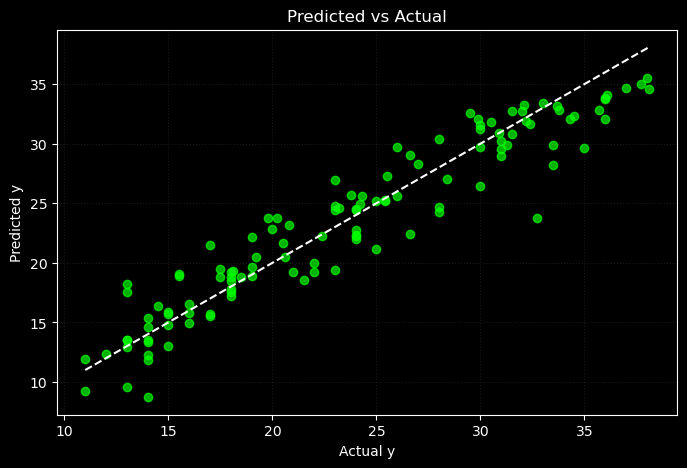

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.style.use('default')

plt.scatter(y_test, y_pred_test, color='lime', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='white', linestyle='--')

plt.gca().set_facecolor('black')
plt.gcf().patch.set_facecolor('black')  # This line removes the white outer area

plt.xlabel("Actual y", color='white')
plt.ylabel("Predicted y", color='white')
plt.title("Predicted vs Actual", color='white')
plt.tick_params(colors='white')

for spine in plt.gca().spines.values():
    spine.set_color('white')

plt.grid(True, linestyle=':', color='white', alpha=0.1)
plt.show()


### **📊 Model Performance Summary**

##### **✅ Generalization:**
Test R²: 0.8998

Train R²: 0.8551

The model generalizes well — higher R² on the test set suggests no overfitting and strong performance on unseen data.

##### **✅ Error Metrics:**
MSE decreased from 6.4085 to 5.6786, a 5.93% reduction in average prediction error (based on RMSE).

Both MSE and MAE continue to drop on training and test sets, indicating the model is still converging smoothly.

##### **✅ R² Score Improvements:**
Train R² improved slightly: 0.8550 → 0.8551 (marginal but stable)

Test R² improved notably: 0.8841 → 0.8998

A meaningful gain in test R² suggests the optimization path is stable and effective.

### **📈 Summary:**
The model outperforms the traditional implementation, with lower errors, better generalization, and a stronger test R². Training is on the right track and nearing convergence.

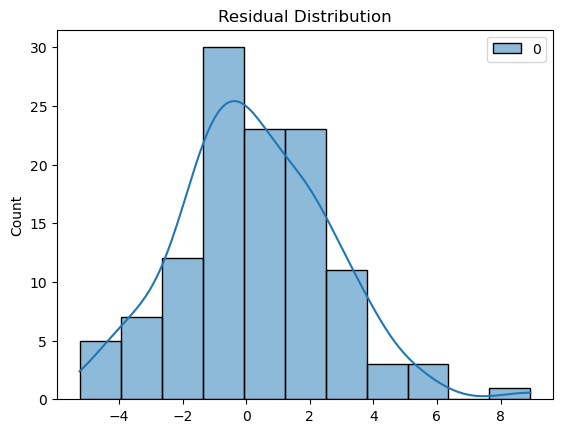

In [99]:
import seaborn as sns

residuals = y_test - y_pred_test

# Histogram works — leave as-is
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

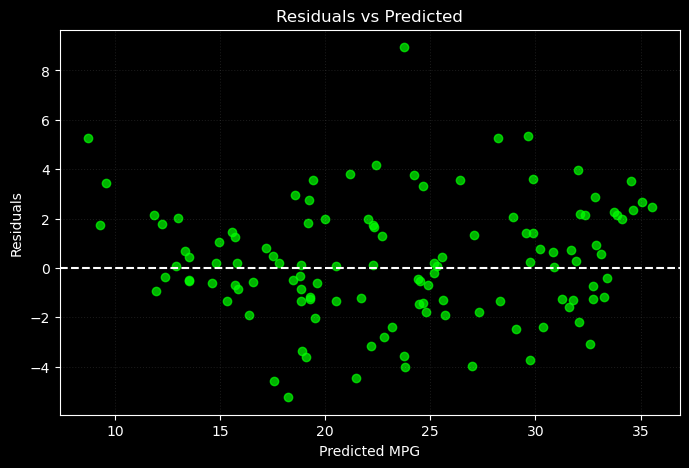

In [100]:
plt.figure(figsize=(8, 5))
plt.style.use('default')

# Basic plot with lime points and black background
plt.scatter(y_pred_test, residuals, color='lime', alpha=0.7)
plt.axhline(0, color='white', linestyle='--')

# Black background and white text
plt.gca().set_facecolor('black')
plt.gcf().patch.set_facecolor('black')  # This line removes the white outer area
plt.xlabel("Predicted MPG", color='white')
plt.ylabel("Residuals", color='white')
plt.title("Residuals vs Predicted", color='white')
plt.tick_params(colors='white')

# White border
for spine in plt.gca().spines.values():
    spine.set_color('white')

plt.grid(True, linestyle=':', color='white', alpha=0.1)
plt.show()


Residuals look evenly distributed

No strong trend or shape, which means model generalized

In [101]:
#Converting logs to DataFrame
df_log = pd.DataFrame({
    'iteration': iteration_log,
    'cost': cost_log,
    'bias': bias_log,
    'weight_log' : weight_log
})

#Saving log
#df_log.to_csv('gd_convergence_log.csv', index=False)

NameError: name 'iteration_log' is not defined

In [ ]:
# Step 1: Convert X_train_scaled to DataFrame
X_scaled_df = pd.DataFrame(X_train_scaled, columns=[f'feature_{i}' for i in range(X_train_scaled.shape[1])])

# Step 2: Combine with y_train
df_log_Xny_train = X_scaled_df.copy()

df_log_Xny_train['y_train'] = y_train.ravel()  # or y_train.flatten()

#Saving log
#df_log_Xny_train.to_csv('X-and-y-train.csv')